In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


## Runoff historic stats

In [3]:
MAR = xr.open_dataset(r'C:\Users\s1834371\Documents\MAR.nc', engine='netcdf4')
summed_sector_discharge = MAR.sum(dim='station')

In [5]:
summed_sector_discharge_df = pd.DataFrame(data=summed_sector_discharge['discharge'].values, index=MAR.time, columns=['summed_discharge'])
mask = (summed_sector_discharge_df.index.month == 8) & (summed_sector_discharge_df.index.day >= 28) | (summed_sector_discharge_df.index.month == 9) & (summed_sector_discharge_df.index.day <= 30) # late season

late_season = summed_sector_discharge_df[mask]
print(late_season.max())

top_10_largest = late_season.nlargest(10, 'summed_discharge')
print(top_10_largest)

summed_discharge    162384.988042
dtype: float64
            summed_discharge
2022-09-03     162384.988042
1952-09-06     161159.158373
2010-09-02     121193.340891
2022-09-05     108107.693608
1952-09-05     107234.903500
2022-09-04     104235.741872
2003-08-30      95791.789371
2003-08-28      90535.974519
2022-09-02      88376.328810
1952-09-07      88050.347967


In [2]:
MAR = xr.open_dataset(r'C:\Users\s1834371\Documents\MAR.nc', engine='netcdf4')

land_term_stations = [66855,66850,66847,66834,66819,66783,66768,66755,66595,66592,66591,66576,66574,66571,66564,66561,66554,66549,66541,66533,66532,66530,66518,66517,66480,66474,66472,66463,66451,66446,66445,66444,66416,66414,66407,66388,66356,66353,66350,66346,66344] # land-terminating outlets downstream of flux gates
station_sel = MAR.sel(station=land_term_stations)
summed_sector_discharge = station_sel.sum(dim='station')

In [3]:
summed_sector_discharge_df = pd.DataFrame(data=summed_sector_discharge['discharge'].values, index=MAR.time, columns=['summed_discharge'])
mask = (summed_sector_discharge_df.index.month == 8) & (summed_sector_discharge_df.index.day >= 15) | (summed_sector_discharge_df.index.month == 9) & (summed_sector_discharge_df.index.day <= 30) # late season

late_season = summed_sector_discharge_df[mask]
print(late_season.max())

top_10_largest = late_season.nlargest(10, 'summed_discharge')
print(top_10_largest)

summed_discharge    7076.343987
dtype: float64
            summed_discharge
2022-09-03       7076.343987
2021-08-15       6089.163714
2003-08-27       5814.723611
2006-08-15       5625.878869
1952-09-06       5351.419525
2021-08-18       5194.076270
2010-09-02       4821.647418
2014-08-23       4734.944933
2022-09-02       4567.269362
2000-08-19       4508.661121


In [4]:
melt_variation = late_season.diff()
print(melt_variation)

top_10_largest_diff = melt_variation.nlargest(10, 'summed_discharge')
print(top_10_largest_diff)

            summed_discharge
1950-08-15               NaN
1950-08-16        360.190928
1950-08-17       2291.160515
1950-08-18       -436.288013
1950-08-19       -810.567458
...                      ...
2022-09-26       1137.495074
2022-09-27       -487.104542
2022-09-28       -523.111733
2022-09-29       -133.290278
2022-09-30        -11.950856

[3431 rows x 1 columns]
            summed_discharge
2021-08-15       6089.162256
2006-08-15       5624.736343
2022-09-02       4515.705644
1952-09-04       4289.158312
2012-08-15       3175.920759
1977-08-15       3061.290527
2014-08-23       2930.575207
2003-08-27       2911.122687
2010-09-02       2688.256477
2022-09-03       2509.074625


In [11]:
melt_variation_all = summed_sector_discharge_df.diff()
print(melt_variation_all)

top_10_largest_diff2 = melt_variation_all.nlargest(10, 'summed_discharge')
print(top_10_largest_diff2)

            summed_discharge
1950-01-01               NaN
1950-01-02      8.889722e-08
1950-01-03     -7.624236e-08
1950-01-04      9.356513e-08
1950-01-05      1.056759e-07
...                      ...
2022-12-27      5.138818e-08
2022-12-28      3.908134e-08
2022-12-29      8.063775e-08
2022-12-30      3.755406e-12
2022-12-31      0.000000e+00

[26663 rows x 1 columns]
            summed_discharge
2021-08-14       5427.325598
1959-07-27       4973.801687
1997-08-11       4750.284269
1959-07-11       4643.514629
2005-07-14       4565.195917
2022-09-02       4515.705644
1951-06-23       4481.906649
2012-07-27       4390.808457
1952-09-04       4289.158312
1952-07-26       4254.030031


In [ ]:
summed_sector_discharge.loc[(summed_sector_discharge['time'].dt.day==25) & (summed_sector_discharge['time'].dt.month==[8,9])]


# Land-terminating Sector

In [7]:
MAR = xr.open_dataset(r'C:\Users\s1834371\Documents\PhD\melt22\data\RUNOFF\MAR.nc', engine='netcdf4')
MAR_22 =  MAR.sel(time=slice('2022-01','2022-12')) # 2022


land_term_stations = [66855,66850,66847,66834,66819,66783,66768,66755,66595,66592,66591,66576,66574,66571,66564,66561,66554,66549,66541,66533,66532,66530,66518,66517,66480,66474,66472,66463,66451,66446,66445,66444,66416,66414,66407,66388,66356,66353,66350,66346,66344] # land-terminating outlets downstream of flux gates
station_sel = MAR_22.sel(station=land_term_stations)
summed_sector_discharge = station_sel.sum(dim='station')

Annual discharge: 12.69 Gt 
Annual discharge (nomelt): 10.25 Gt 
Percentage increase: 23.71 %


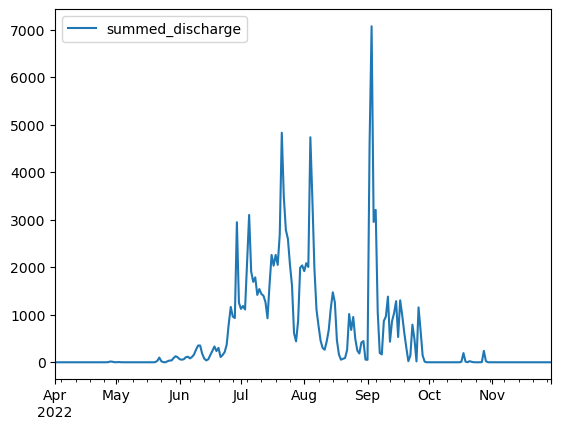

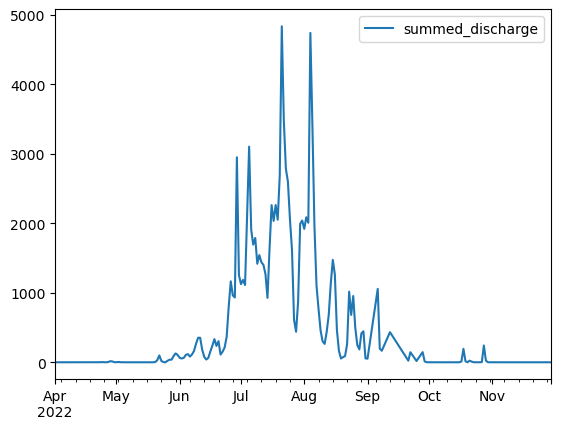

In [18]:
sector_discharge = pd.DataFrame(data=summed_sector_discharge['discharge'].values, index=MAR_22.time, columns=['summed_discharge'])
sector_discharge = sector_discharge[(sector_discharge.index >= '2022-04-01') & (sector_discharge.index <= '2022-11-30')] # subsetting to melt-season

### removing timestamps with high melt in Septemer ################
sector_discharge_nomelt = sector_discharge[(sector_discharge.index < '2022-09-02') | (sector_discharge.index > '2022-09-05')] # first melt event
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-09') | (sector_discharge_nomelt.index > '2022-09-11')] #2nd melt event.....
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-13') | (sector_discharge_nomelt.index > '2022-09-20')]
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-23') | (sector_discharge_nomelt.index > '2022-09-24')]
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-26') | (sector_discharge_nomelt.index > '2022-09-27')]
sector_discharge_nomelt = sector_discharge_nomelt.resample('D').interpolate() # linearly interpolating over removed melt events

#### plots with and without melt events ############################
sector_discharge.plot() # plot with melt events
sector_discharge_nomelt.plot()  # plot with melt events removed

######### calculating total discharge ################################
total_discharge = sector_discharge.sum() * 86400 # convert to m3
total_discharge = ((total_discharge * 1000)/1000000000000) * (1000/917) # convert to Gt of ice

total_discharge_nomelt = sector_discharge_nomelt.sum() * 86400 # convert to m3
total_discharge_nomelt = ((total_discharge_nomelt * 1000)/1000000000000) * (1000/917) # convert to Gt of ice

percent_increase = ((total_discharge - total_discharge_nomelt)/ total_discharge_nomelt) * 100   # percentage increase in discharge

print('Annual discharge: %.2f Gt \nAnnual discharge (nomelt): %.2f Gt \nPercentage increase: %.2f %%' % (total_discharge, total_discharge_nomelt, percent_increase))


Timesteps to remove: 2nd, 3rd, 4th, 5th    17th, 18th     23rd, 24th     26th, 27th

# Marine-terminating sector

In [24]:
MAR = xr.open_dataset(r'C:\Users\s1834371\Documents\PhD\melt22\data\RUNOFF\MAR.nc', engine='netcdf4')
MAR_22 =  MAR.sel(time=slice('2022-01','2022-12')) # 2022

mtg_stations = [73658,73656,73652,73648,73622,73601,73562]
station_sel = MAR_22.sel(station=mtg_stations)
summed_sector_discharge_mtg = station_sel.sum(dim='station')

Annual discharge: 6.27 Gt 
Annual discharge (nomelt): 4.87 Gt 
Percentage increase: 28.78 %


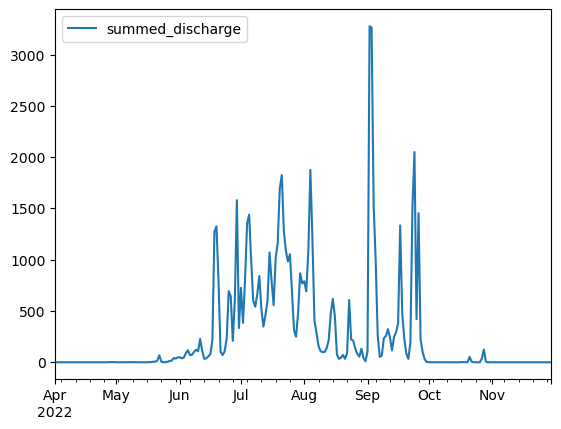

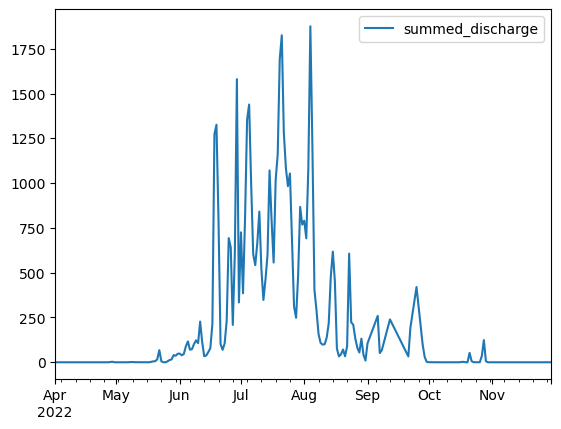

In [25]:
sector_discharge = pd.DataFrame(data=summed_sector_discharge_mtg['discharge'].values, index=MAR_22.time, columns=['summed_discharge'])
sector_discharge = sector_discharge[(sector_discharge.index >= '2022-04-01') & (sector_discharge.index <= '2022-11-30')] # subsetting to melt-season

### removing timestamps with high melt in Septemer ################
sector_discharge_nomelt = sector_discharge[(sector_discharge.index < '2022-09-02') | (sector_discharge.index > '2022-09-05')] # first melt event
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-09') | (sector_discharge_nomelt.index > '2022-09-11')] #2nd melt event.....
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-13') | (sector_discharge_nomelt.index > '2022-09-20')]
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-23') | (sector_discharge_nomelt.index > '2022-09-24')]
sector_discharge_nomelt = sector_discharge_nomelt[(sector_discharge_nomelt.index < '2022-09-26') | (sector_discharge_nomelt.index > '2022-09-27')]
sector_discharge_nomelt = sector_discharge_nomelt.resample('D').interpolate() # linearly interpolating over removed melt events

#### plots with and without melt events ############################
sector_discharge.plot() # plot with melt events
sector_discharge_nomelt.plot()  # plot with melt events removed

######### calculating total discharge ################################
total_discharge = sector_discharge.sum() * 86400 # convert to m3
total_discharge = ((total_discharge * 1000)/1000000000000) * (1000/917) # convert to Gt of ice

total_discharge_nomelt = sector_discharge_nomelt.sum() * 86400 # convert to m3
total_discharge_nomelt = ((total_discharge_nomelt * 1000)/1000000000000) * (1000/917) # convert to Gt of ice

percent_increase = ((total_discharge - total_discharge_nomelt)/ total_discharge_nomelt) * 100   # percentage increase in discharge

print('Annual discharge: %.2f Gt \nAnnual discharge (nomelt): %.2f Gt \nPercentage increase: %.2f %%' % (total_discharge, total_discharge_nomelt, percent_increase))